In [1]:
# load json file as dictionary
import json
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import re



In [2]:
patents_text = pd.read_csv("patents_text_topic_modelling2.csv")

/var/folders/jy/j77v476x03737ryp7gll_0p00000gn/T/ipykernel_49185/3127923996.py:1: DtypeWarning: Columns (18,20,21,23,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  patents_text = pd.read_csv("patents_text_topic_modelling2.csv")


In [3]:
patents_text['title'] = patents_text['title'].fillna('')
patents_text['abstract'] = patents_text['abstract'].fillna('')
patents_text['description'] = patents_text['description'].fillna('')
patents_text['claims'] = patents_text['claims'].fillna('')

## Sustainability of AI

In [4]:
patents_text['text'] = patents_text['title'] + " " + patents_text['abstract'] + " " + patents_text["description"].fillna('')

In [5]:
sofai = patents_text[(patents_text['SofAI'] == 1) & (patents_text['AIforS'] == 0)]

In [6]:
sofaidescr = patents_text[(patents_text['SofAI'] == 1) & (patents_text['AIforS'] == 0) & (patents_text["description"]!= '')]

In [7]:
len(sofaidescr)

243

# Sustainability levers
## Specific SofAI

In [8]:
import re
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Make sure to download these resources if you haven't already
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christinaziegler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christinaziegler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
# Lists of keywords for each category
keywords_water = ["water-efficient", "water-saving", "reduced water use", "water consumption"]
keywords_energy = ["energy efficiency", "low power", "energy saving", "power reduction", "energy efficient", "energy-efficient", "power efficiency", "energy consumption", "power consumption", "electricity consumption", "run time", "runtime", "efficiency", " efficient"]
keywords_waste = ["recyclable", "waste reduction", "biodegradable", "recycled materials", "recycle", "recycling", "waste", "toxic", "end of life", "durability", "longevity", "extended life", "increase lifetime", "lifespan", "long-lasting", "long life"]
keywords_carbon = ['low emission', 'reduced carbon footprint', 'carbon reduction', "carbon emission"]
keywords_metals = ["rare-earth-free", "alternative materials", "reduced metal usage", "rare metal", "niobium", "aluminium", "europium", "gold", "silver",
                   "platinum", "palladium", " tin ", "tantalum", 
                   "tungsten", "bismuth", "cadmium", "cobalt",
                    "gallium", "germanium", "indium", "lithium",
                     "molybdenum", "selenium", "tellurium", "vanadium",
                     "zirconium"]
#keywords_lifetime = ["durability", "longevity", "extended life", "increase lifetime", "lifespan", "long-lasting", "long life"]
keywords_performance=["performance"]
keywords_efficiency = ["efficiency", " efficient", "optimal"]

keywords_water2 = ['water consumption', 'water usage', "water"]
keywords_energy2 = ['energy consumption', 'energy usage', "electricity consumption", "electricity usage", "energy", "electricity", "power consumption", "runtime", "run time", "power"]
keywords_waste2 = ['waste', 'recycling']
keywords_carbon2 = ['emission', 'carbon footprint', 'carbon reduction', "emit"]
keywords_metals2 = ['rare metal', "niobium", "aluminium", "europium", "gold", "silver",
                   "platinum", "palladium", " tin ", "tantalum", 
                   "tungsten", "bismuth", "cadmium", "cobalt",
                    "gallium", "germanium", "indium", "lithium",
                     "molybdenum", "selenium", "tellurium", "vanadium",
                     "zirconium"]

def search_abstracts_for_keywords_with_context(abstracts, primary_keywords, secondary_keywords=None, context_words=['less', 'reduce', "reduction", "lower", "optimize", "optimization"], context_range=3):
    keyword_presence = []
    matching_indices = []
    for index, abstract in enumerate(abstracts):
        found_keyword = False
        words = re.findall(r'\w+', abstract.lower())  # Tokenize the abstract into words
        for i, word in enumerate(words):
            # Check primary keywords
            for keyword in primary_keywords:
                if keyword.lower() in word:  # Check if the word is a primary keyword
                    found_keyword = True
                    matching_indices.append(index)
                    break
            # Check secondary keywords with context words
            if secondary_keywords and not found_keyword:
                for keyword in secondary_keywords:
                    if keyword.lower() in word:  # Check if the word is a secondary keyword
                        start = max(0, i - context_range)
                        end = min(len(words), i + context_range + 1)
                        context = words[start:i] + words[i+1:end]
                        if any(context_word in context for context_word in context_words):
                            found_keyword = True
                            matching_indices.append(index)
                            break
            if found_keyword:
                break
        keyword_presence.append(found_keyword)
    return keyword_presence, matching_indices

def count_patents_by_keywords(abstracts, keyword_lists, secondary_keyword_lists=None, context_words=['less', 'reduce', "reduction", "lower", "optimi", "efficient", "efficiency"], context_range=5):
    keyword_counts = {}
    example_abstracts = {}
    all_indices = []
    for category, keywords in keyword_lists.items():
        if category != "Efficiency" and category != "Performance" and category != "Carbon":  # Check all categories except "Efficiency"
            secondary_keywords = secondary_keyword_lists.get(category, None) if secondary_keyword_lists else None
            presence, indices = search_abstracts_for_keywords_with_context(abstracts, keywords, secondary_keywords, context_words, context_range)
            keyword_counts[category] = sum(presence)
            example_abstracts[category] = [abstracts[i] for i in indices[:5] if i < len(abstracts)]
            all_indices.extend(indices)



    # After processing all categories, determine the unmatched abstracts
    unmatched_indices = [i for i, abstract in enumerate(abstracts) if i not in all_indices]
    keyword_counts["Other"] = len(unmatched_indices)  # Number of unmatched abstracts
    example_abstracts["Other"] = [abstracts[i] for i in unmatched_indices[:5]]  # Example unmatched abstracts, if needed

    return keyword_counts, example_abstracts, filtered_indices

def wrap_text(text, width=70):
    return textwrap.fill(text, width)

# Define the categories and their keywords
keyword_lists_small = {
    'Water': keywords_water,
    'Energy': keywords_energy,
    'Waste': keywords_waste,
    'Carbon': keywords_carbon,
    'Metals': keywords_metals,
    #'Lifetime': keywords_lifetime,
    "Efficiency": keywords_efficiency,
    "Performance": keywords_performance
}

secondary_keyword_lists_small = {
    'Water': keywords_water2,
    'Energy': keywords_energy2,
    'Waste': keywords_waste2,
    'Carbon': keywords_carbon2,
    'Metals': keywords_metals2
}

# Assuming 'sofai' DataFrame and 'text' column exist
abstracts_small = sofaidescr['text'].dropna().tolist()  # Drop any NaN values and convert to list
print(f"Number of abstracts: {len(abstracts_small)}")

# Count patents mentioning keywords in each category and get example abstracts

patent_counts_small, example_abstracts_small, filtered_indices_small = count_patents_by_keywords(abstracts_small, keyword_lists_small, secondary_keyword_lists_small)

# Plot the results using Seaborn
categories_small = list(patent_counts_small.keys())
counts_small = list(patent_counts_small.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=categories_small, y=counts_small, palette='BuGn_d')
plt.xlabel('Keyword Categories')
plt.ylabel('Number of Patents')
plt.title('Number of Patents Mentioning Keywords by Category')
plt.xticks(rotation=45)
sns.despine()
plt.show()


Number of abstracts: 243


NameError: name 'filtered_indices' is not defined

In [ ]:
# Create the treemap
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
color_map = {
    'Water': '#8ba7d7',  
    'Carbon': '#7788a6', 
    'Other': '#a0a2a4', 
    'Metals': '#b4d1b6',  
    'Energy': '#4a9157', 
    'Waste': '#024d23',
    'Lifetime': "#8ba7d7"  # Update key to match the modified label
}

data = pd.DataFrame(list(patent_counts_small.items()), columns=['Category', 'Count'])

# Create the treemap
fig = px.treemap(
    data,
    path=['Category'],  # Defines the hierarchy of categories
    values='Count',
    color='Category',
    color_discrete_map=color_map,
)

fig.add_annotation(
    x=0.5,  # Center position
    y=1.08,  # Position above the plot
    text='Sustainability of AI patents by environmental lever<br><span style="font-size: smaller;">N(patents) = 243</span>',
    showarrow=False,
    xref="paper",
    yref="paper",
    align="center",
    font=dict(size=18, color="black"),
)

fig.update_layout(margin=dict(t=60, l=60, r=60, b=60), font= dict(
        family="Roboto Mono, monospace",  # Font family
        size=18
        ), 
        title_font_size= 15,
        uniformtext=dict(minsize=14, mode='hide'),
        hovermode = 'closest',
        width=750,height=750,
        showlegend=True)

fig.add_annotation(
    x=1.07,  # Adjust these coordinates as necessary
    y=0.05,   # Adjust these coordinates as necessary
    text="Water",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#8ba7d7"
)
fig.add_annotation(
    x=1.01,  # Adjust these coordinates as necessary
    y=0.02,   # Adjust these coordinates as necessary
    text="1",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#8ba7d7"
)


fig.update_traces(textinfo="label+value")
fig.show()
pio.write_image(fig, 'treemap_small.png', scale=5)  # Adjust scale for higher resolution


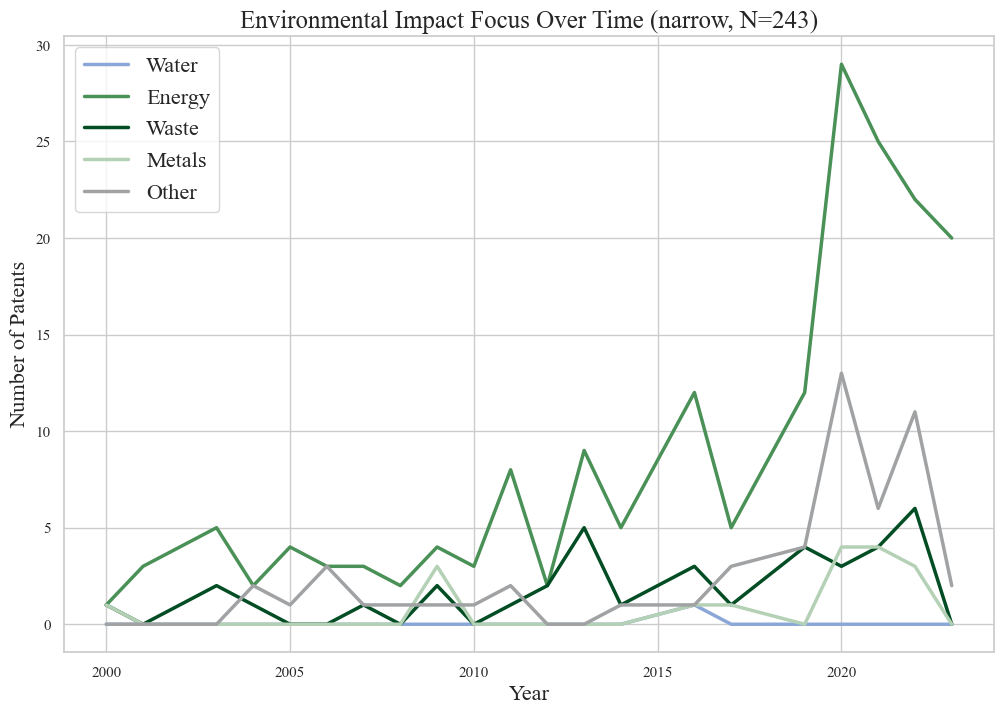

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict
import textwrap

# Define the search function as provided
def search_abstracts_for_keywords_with_context(abstracts, primary_keywords, secondary_keywords=None, context_words=['less', 'reduce', "reduction", "lower", "optimize", "optimization"], context_range=3):
    keyword_presence = []
    matching_indices = []
    for index, abstract in enumerate(abstracts):
        found_keyword = False
        words = re.findall(r'\w+', abstract.lower())  # Tokenize the abstract into words
        for i, word in enumerate(words):
            # Check primary keywords
            for keyword in primary_keywords:
                if keyword.lower() in word:  # Check if the word is a primary keyword
                    found_keyword = True
                    matching_indices.append(index)
                    break
            # Check secondary keywords with context words
            if secondary_keywords and not found_keyword:
                for keyword in secondary_keywords:
                    if keyword.lower() in word:  # Check if the word is a secondary keyword
                        start = max(0, i - context_range)
                        end = min(len(words), i + context_range + 1)
                        context = words[start:i] + words[i+1:end]
                        if any(context_word in context for context_word in context_words):
                            found_keyword = True
                            matching_indices.append(index)
                            break
            if found_keyword:
                break
        keyword_presence.append(found_keyword)
    return keyword_presence, matching_indices

# Define the count function to include year aggregation
def count_patents_by_keywords_and_year(abstracts, publication_dates, keyword_lists, secondary_keyword_lists=None, context_words=['less', 'reduce', "reduction", "lower", "optimi", "efficient", "efficiency"], context_range=5):
    keyword_counts = defaultdict(lambda: defaultdict(int))
    all_indices = []

    for category, keywords in keyword_lists.items():
        if category not in ["Efficiency", "Performance", "Carbon"]:  # Check all categories except "Efficiency"
            secondary_keywords = secondary_keyword_lists.get(category, None) if secondary_keyword_lists else None
            presence, indices = search_abstracts_for_keywords_with_context(abstracts, keywords, secondary_keywords, context_words, context_range)
            
            for i in indices:
                year = pd.to_datetime(publication_dates[i]).year
                keyword_counts[category][year] += 1
            all_indices.extend(indices)

    # After processing all categories, determine the unmatched abstracts
    unmatched_indices = [i for i, abstract in enumerate(abstracts) if i not in all_indices]
    for i in unmatched_indices:
        year = pd.to_datetime(publication_dates[i]).year
        keyword_counts["Other"][year] += 1

    return keyword_counts

# Define the categories and their keywords
keyword_lists_small = {
    'Water': keywords_water,
    'Energy': keywords_energy,
    'Waste': keywords_waste,
    'Carbon': keywords_carbon,
    'Metals': keywords_metals,
    "Efficiency": keywords_efficiency,
    "Performance": keywords_performance
}

secondary_keyword_lists_small = {
    'Water': keywords_water2,
    'Energy': keywords_energy2,
    'Waste': keywords_waste2,
    'Carbon': keywords_carbon2,
    'Metals': keywords_metals2
}



# Filter abstracts and publication dates
abstracts_small = sofaidescr['text'].dropna().tolist()
publication_dates_small = pd.to_datetime(sofaidescr['publication_date_EPO'], format='%Y%m%d').to_list()



# Count patents mentioning keywords in each category by year
patent_counts_by_year = count_patents_by_keywords_and_year(abstracts_small, publication_dates_small, keyword_lists_small, secondary_keyword_lists_small)

# Convert the results into a DataFrame for plotting
category_counts_df = pd.DataFrame(patent_counts_by_year).fillna(0)
category_counts_df = category_counts_df.sort_index()  # Ensure the years are sorted
# Define the color map
color_map = {
    'Water': '#8ba7d7',  
    'Carbon': '#7788a6', 
    'Other': '#a0a2a4', 
    'Metals': '#b4d1b6',  
    'Energy': '#4a9157', 
    'Waste': '#024d23',
    'Lifetime': "#8ba7d7"
}

# Set the style first
sns.set(style="whitegrid")

# Set the font to Times New Roman and fontsize
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

# Plot the results with the specified color map and remove markers
plt.figure(figsize=(12, 8))
for category in category_counts_df.columns:
    plt.plot(category_counts_df.index, category_counts_df[category], label=category, color=color_map.get(category),linewidth=2.5)

# Customize plot appearance
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Patents', fontsize=16)
plt.title('Environmental Impact Focus Over Time (narrow, N=243)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()



## larger SofAI

In [16]:
sofai_large = patents_text[patents_text['SofAI'] == 1]
sofai_largedescr = patents_text[(patents_text['SofAI'] == 1) & (patents_text["description"]!= '')]

In [17]:
len(sofai_large)

3048

In [18]:
len(sofai_largedescr)

1465

Number of abstracts: 1465


/var/folders/jy/j77v476x03737ryp7gll_0p00000gn/T/ipykernel_22886/3595492196.py:111: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




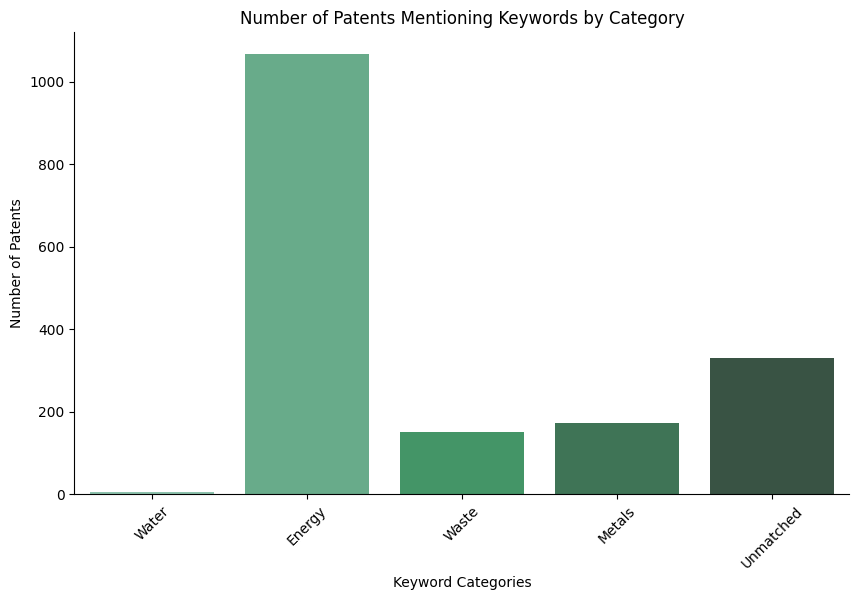

In [193]:
# Lists of keywords for each category
keywords_water = ["water-efficient", "water-saving", "reduced water use", "water consumption", "water use"]
keywords_energy = ["energy efficiency", "low power", "energy saving", "power reduction", "energy efficient", "energy-efficient", "power efficiency", "energy consumption", "power consumption", "power use", "electricity consumption", "run time", "runtime", "efficiency", " efficient"]
keywords_waste = ["recyclable", "waste reduction", "biodegradable", "recycled materials", "recycle", "recycling", "waste", "toxic", "end of life", "durability", "longevity", "extended life", "increase lifetime", "lifespan", "long-lasting", "long life"]
keywords_carbon = ['low emission', 'reduced carbon footprint', 'carbon reduction', "carbon emission", "CO2", "carbon footprint"]
keywords_metals = ["rare-earth-free", "alternative materials", "reduced metal usage", "rare metal", "niobium", "aluminium", "europium", "gold", "silver",
                   "platinum", "palladium", " tin ", "tantalum", 
                   "tungsten", "bismuth", "cadmium", "cobalt",
                    "gallium", "germanium", "indium", "lithium",
                     "molybdenum", "selenium", "tellurium", "vanadium",
                     "zirconium"]
keywords_performance=["performance"]
keywords_efficiency = ["efficiency", " efficient", "optimal"]

keywords_water2 = ['water consumption', 'water usage', "water"]
keywords_energy2 = ['energy consumption', 'energy usage', "electricity consumption", "electricity usage", "energy", "electricity", "power consumption", "runtime", "run time", "power"]
keywords_waste2 = ['waste', 'recycling']
keywords_carbon2 = ['emission', 'carbon footprint', 'carbon reduction', "emit"]
keywords_metals2 = ['rare metal', "niobium", "aluminium", "europium", "gold", "silver",
                   "platinum", "palladium", " tin ", "tantalum", 
                   "tungsten", "bismuth", "cadmium", "cobalt",
                    "gallium", "germanium", "indium", "lithium",
                     "molybdenum", "selenium", "tellurium", "vanadium",
                     "zirconium"]

def search_abstracts_for_keywords_with_context(abstracts, primary_keywords, secondary_keywords=None, context_words=['less', 'reduce', "reduction", "lower", "optimize", "optimization"], context_range=3):
    keyword_presence = []
    matching_indices = []
    for index, abstract in enumerate(abstracts):
        found_keyword = False
        words = re.findall(r'\w+', abstract.lower())  # Tokenize the abstract into words
        for i, word in enumerate(words):
            # Check primary keywords
            for keyword in primary_keywords:
                if keyword.lower() in word:  # Check if the word is a primary keyword
                    found_keyword = True
                    matching_indices.append(index)
                    break
            # Check secondary keywords with context words
            if secondary_keywords and not found_keyword:
                for keyword in secondary_keywords:
                    if keyword.lower() in word:  # Check if the word is a secondary keyword
                        start = max(0, i - context_range)
                        end = min(len(words), i + context_range + 1)
                        context = words[start:i] + words[i+1:end]
                        if any(context_word in context for context_word in context_words):
                            found_keyword = True
                            matching_indices.append(index)
                            break
            if found_keyword:
                break
        keyword_presence.append(found_keyword)
    return keyword_presence, matching_indices

def count_patents_by_keywords(abstracts, keyword_lists, secondary_keyword_lists=None, context_words=['less', 'reduce', "reduction", "lower", "optimi", "efficient", "efficiency"], context_range=5):
    keyword_counts = {}
    example_abstracts = {}
    all_indices = []
    for category, keywords in keyword_lists.items():
        if category != "Efficiency" and category != "Performance" and category != "Carbon":  # Check all categories except "Efficiency"
            secondary_keywords = secondary_keyword_lists.get(category, None) if secondary_keyword_lists else None
            presence, indices = search_abstracts_for_keywords_with_context(abstracts, keywords, secondary_keywords, context_words, context_range)
            keyword_counts[category] = sum(presence)
            example_abstracts[category] = [abstracts[i] for i in indices[:5] if i < len(abstracts)]
            all_indices.extend(indices)



    # After processing all categories, determine the unmatched abstracts
    unmatched_indices = [i for i, abstract in enumerate(abstracts) if i not in all_indices]
    keyword_counts["Unmatched"] = len(unmatched_indices)  # Number of unmatched abstracts
    example_abstracts["Unmatched"] = [abstracts[i] for i in unmatched_indices[:5]]  # Example unmatched abstracts, if needed

    return keyword_counts, example_abstracts, filtered_indices

def wrap_text(text, width=70):
    return textwrap.fill(text, width)

# Define the categories and their keywords
keyword_lists = {
    'Water': keywords_water,
    'Energy': keywords_energy,
    'Waste': keywords_waste,
    'Carbon': keywords_carbon,
    'Metals': keywords_metals,
    "Efficiency": keywords_efficiency,
    "Performance": keywords_performance
}

secondary_keyword_lists = {
    'Water': keywords_water2,
    'Energy': keywords_energy2,
    'Waste': keywords_waste2,
    'Carbon': keywords_carbon2,
    'Metals': keywords_metals2
}

# Assuming 'sofai' DataFrame and 'text' column exist
abstracts = sofai_largedescr['text'].dropna().tolist()  # Drop any NaN values and convert to list
print(f"Number of abstracts: {len(abstracts)}")

# Count patents mentioning keywords in each category and get example abstracts

patent_counts, example_abstracts, filtered_indices = count_patents_by_keywords(abstracts, keyword_lists, secondary_keyword_lists)

# Plot the results using Seaborn
categories = list(patent_counts.keys())
counts = list(patent_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='BuGn_d')
plt.xlabel('Keyword Categories')
plt.ylabel('Number of Patents')
plt.title('Number of Patents Mentioning Keywords by Category')
plt.xticks(rotation=45)
sns.despine()
plt.show()


In [195]:
patent_counts_small, patent_counts

({'Water': 1, 'Energy': 183, 'Waste': 38, 'Metals': 17, 'Other': 53},
 {'Water': 4, 'Energy': 1067, 'Waste': 151, 'Metals': 172, 'Unmatched': 330})

In [215]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# Assuming patent_counts_small and patent_counts are your datasets
data_small = pd.DataFrame(list(patent_counts_small.items()), columns=['Category', 'Count'])
data_large = pd.DataFrame(list(patent_counts.items()), columns=['Category', 'Count'])
#data_large['Category'] = data_large['Category'].replace('Lifetime', 'Life-<br>span')
data_large['Category'] = data_large['Category'].replace('Unmatched', 'Other')
data_small['Category'] = data_small['Category'].replace('Lifetime', 'Life-<br>span')

color_map = {
    'Water': '#8ba7d7',  
    'Carbon': '#7788a6', 
    'Other': '#a0a2a4', 
    'Metals': '#b4d1b6',  
    'Energy': '#4a9157', 
    'Waste': '#024d23',
}

fig = make_subplots(
    rows=1, cols=2,
    #subplot_titles=('AI specific<br>N(patents) = 243', 'Wider definition<br>N(patents) = 1465'),
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],  # Specify the type of plots as 'domain'
    horizontal_spacing=0.05   # Adjust spacing between plots
)

# Add treemaps
fig1 = px.treemap(
    data_small,
    path=['Category'],
    values='Count',
    color='Category',
    color_discrete_map=color_map
)

fig2 = px.treemap(
    data_large,
    path=['Category'],
    values='Count',
    color='Category',
    color_discrete_map=color_map
)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    margin=dict(t=60, l=60, r=80, b=60),
    font=dict(family="Roboto Mono, monospace", size=18),
    title_font_size=20,
    uniformtext=dict(minsize=14, mode='hide'),
    hovermode='closest',
    width=1500,  # Adjust width to accommodate both plots side by side
    height=750,
    showlegend=True
)



fig.add_annotation(
    x=0.5,  # Center position
    y=1.08,  # Position above the plot
    text='Sustainability of AI patents by environmental impact focus',
    showarrow=False,
    xref="paper",
    yref="paper",
    align="center",
    font=dict(size=18, color="black"),
)


fig.add_annotation(
    x=1.035,  # Adjust these coordinates as necessary
    y=0.04,   # Adjust these coordinates as necessary
    text="Water",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#0a325e"
)
fig.add_annotation(
    x=1.045,  # Adjust these coordinates as necessary
    y=0.01,   # Adjust these coordinates as necessary
    text="4 (0%)",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#0a325e"
)

fig.add_annotation(
    x=0.49,  # Adjust these coordinates as necessary
    y=0.04,   # Adjust these coordinates as necessary
    text="Water",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#0a325e"
)
fig.add_annotation(
    x=0.495,  # Adjust these coordinates as necessary
    y=0.01,   # Adjust these coordinates as necessary
    text="1 (0%)",
    showarrow=False,
    font=dict(family="Roboto Mono, monospace", size=15),
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#0a325e"
)

fig.add_annotation(
    x=0.18, y=1.03,  # Adjust these coordinates to position the title above the first subplot
    text='AI specific<br><span style="font-size: smaller;">N(patents) = 243</span>',
    showarrow=False,
    xref="paper",
    yref="paper",
    font=dict(size=18, color="black"),  # Customize the font size and color here
    align="center"
)

fig.add_annotation(
    x=0.81, y=1.03,  # Adjust these coordinates to position the title above the second subplot
    text='Wider definition<br><span style="font-size: smaller;">N(patents) = 1465</span>',
    showarrow=False,
    xref="paper",
    yref="paper",
    font=dict(size=18, color="black"),  # Customize the font size and color here
    align="center"
)
fig.update_traces(textinfo="label+percent entry+value")
fig.show()
pio.write_image(fig, 'treemap_double.png', scale=5)  # Adjust scale for higher resolution


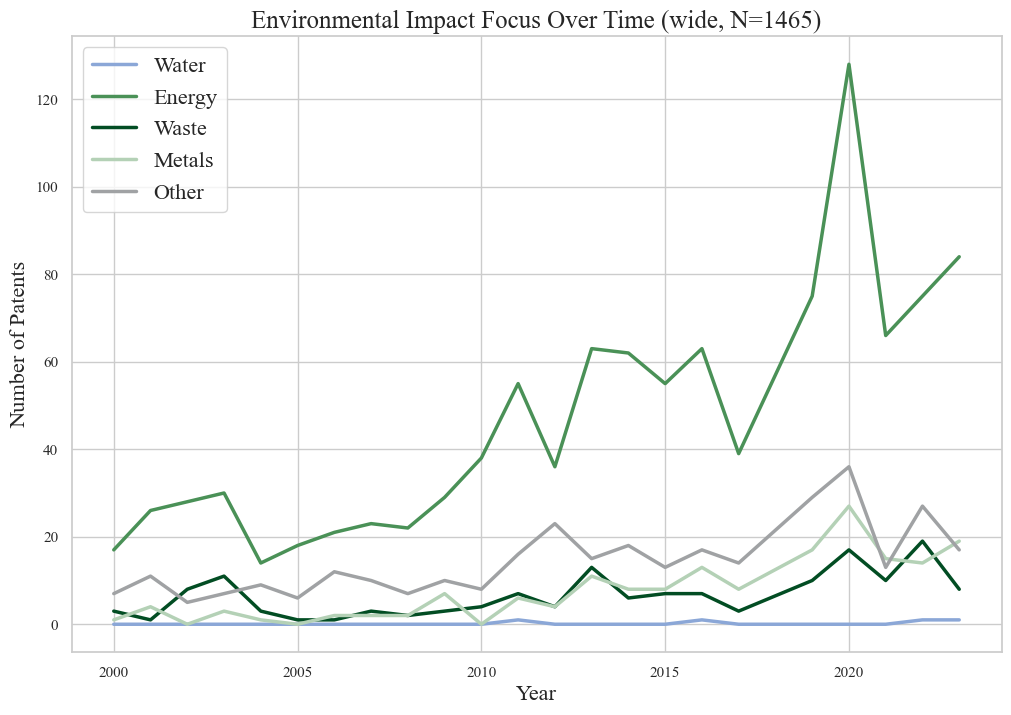

In [27]:
# Filter abstracts and publication dates
abstracts_large = sofai_largedescr['text'].dropna().tolist()
publication_dates_large = pd.to_datetime(sofai_largedescr['publication_date_EPO'], format='%Y%m%d').to_list()



# Count patents mentioning keywords in each category by year
patent_counts_by_year = count_patents_by_keywords_and_year(abstracts_large, publication_dates_large, keyword_lists_small, secondary_keyword_lists_small)

# Convert the results into a DataFrame for plotting
category_counts_df = pd.DataFrame(patent_counts_by_year).fillna(0)
category_counts_df = category_counts_df.sort_index()  # Ensure the years are sorted
# Define the color map
color_map = {
    'Water': '#8ba7d7',  
    'Carbon': '#7788a6', 
    'Other': '#a0a2a4', 
    'Metals': '#b4d1b6',  
    'Energy': '#4a9157', 
    'Waste': '#024d23',
    'Lifetime': "#8ba7d7"
}
# Set the style first
sns.set(style="whitegrid")

# Set the font to Times New Roman and fontsize
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

# Plot the results with the specified color map and remove markers
plt.figure(figsize=(12, 8))
for category in category_counts_df.columns:
    plt.plot(category_counts_df.index, category_counts_df[category], label=category, color=color_map.get(category),linewidth=2.5)

# Customize plot appearance
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Patents', fontsize=16)
plt.title('Environmental Impact Focus Over Time (wide, N=1465)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

